# Assignment 6: Implement SGD for linear regression

In [40]:
from sklearn.datasets import load_boston # to load  datasets from sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import pandas as pd
import math
import sklearn
import pytablewriter

In [7]:
boston=load_boston()

In [8]:
print(boston.data.shape)

(506, 13)


In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [12]:
# Boston datasets 
bostan = pd.DataFrame(boston.data)
print(bostan.head())
# Boston dataset with columns names
bostan_col =pd.DataFrame(boston.data,columns=boston.feature_names)
print(bostan_col.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  

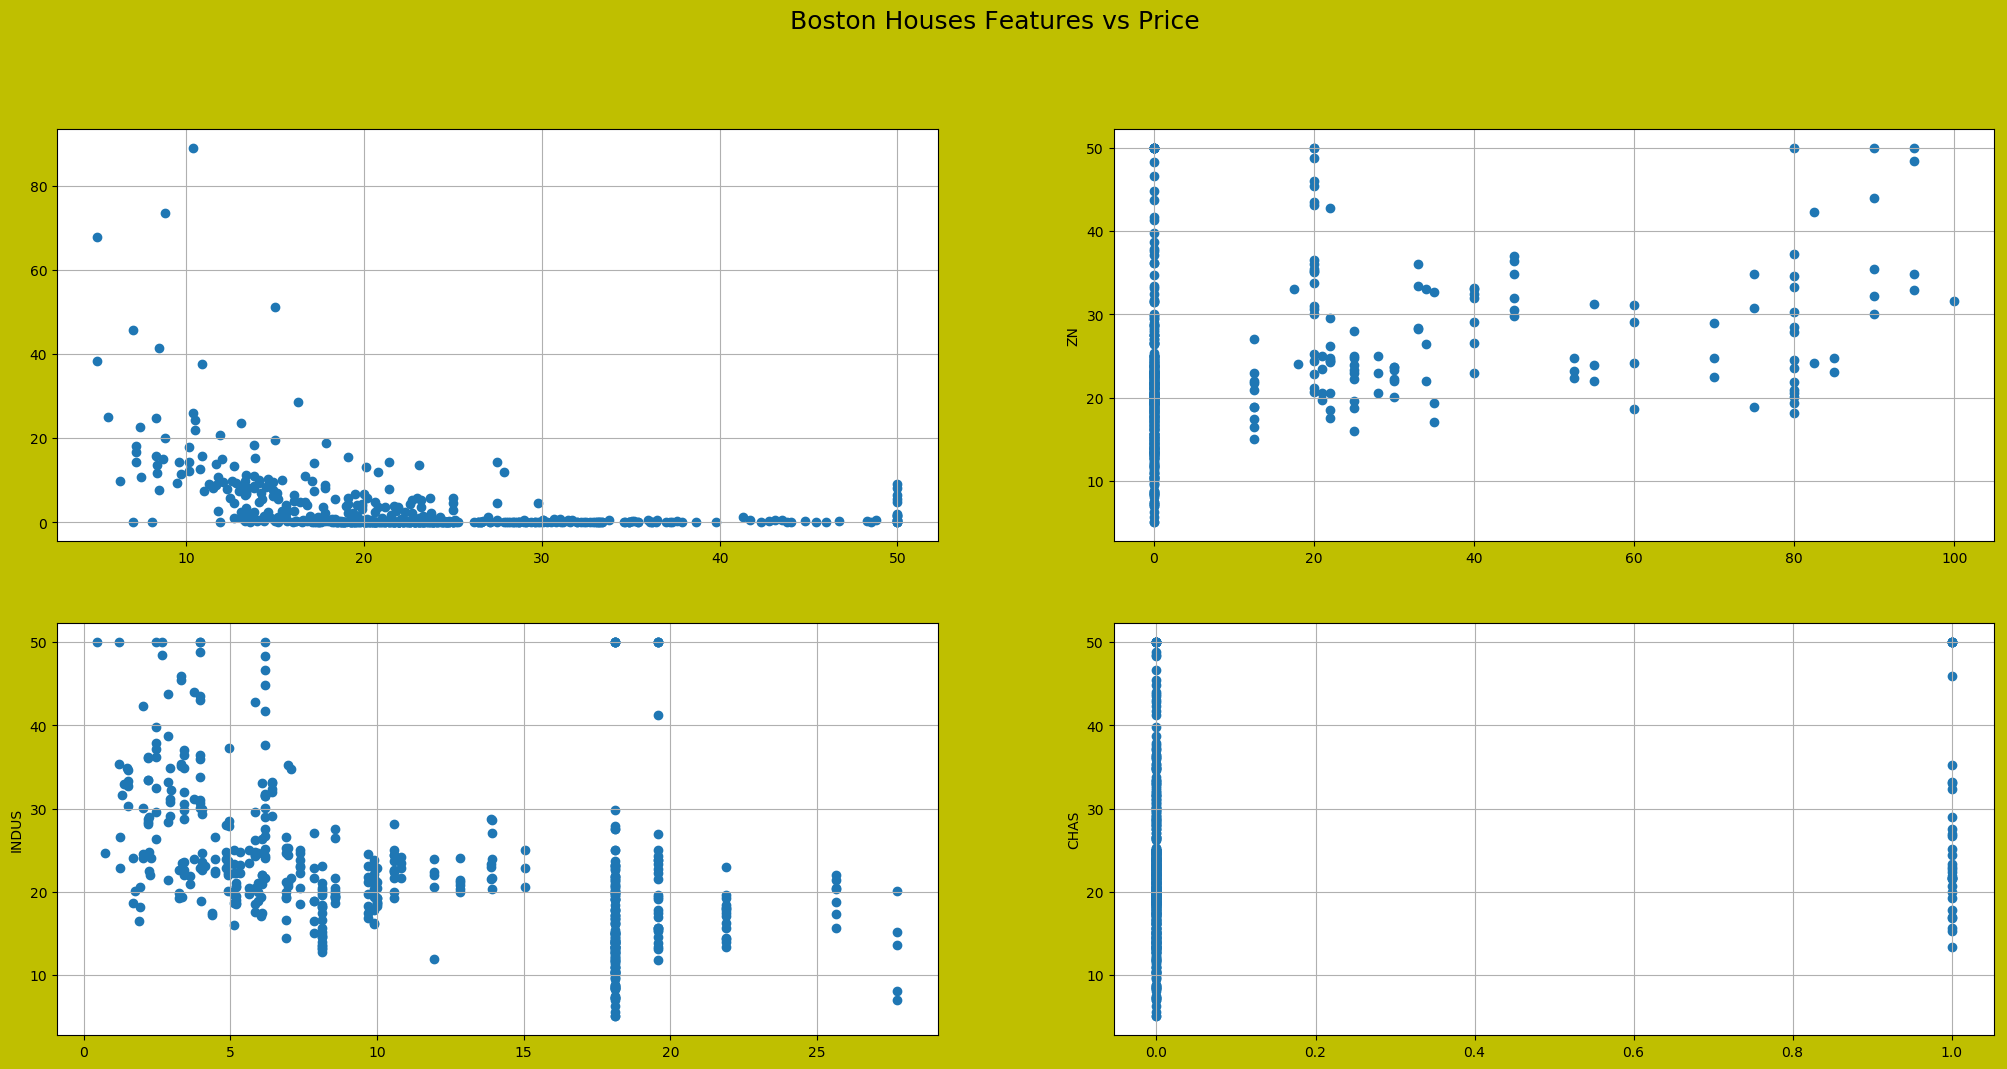

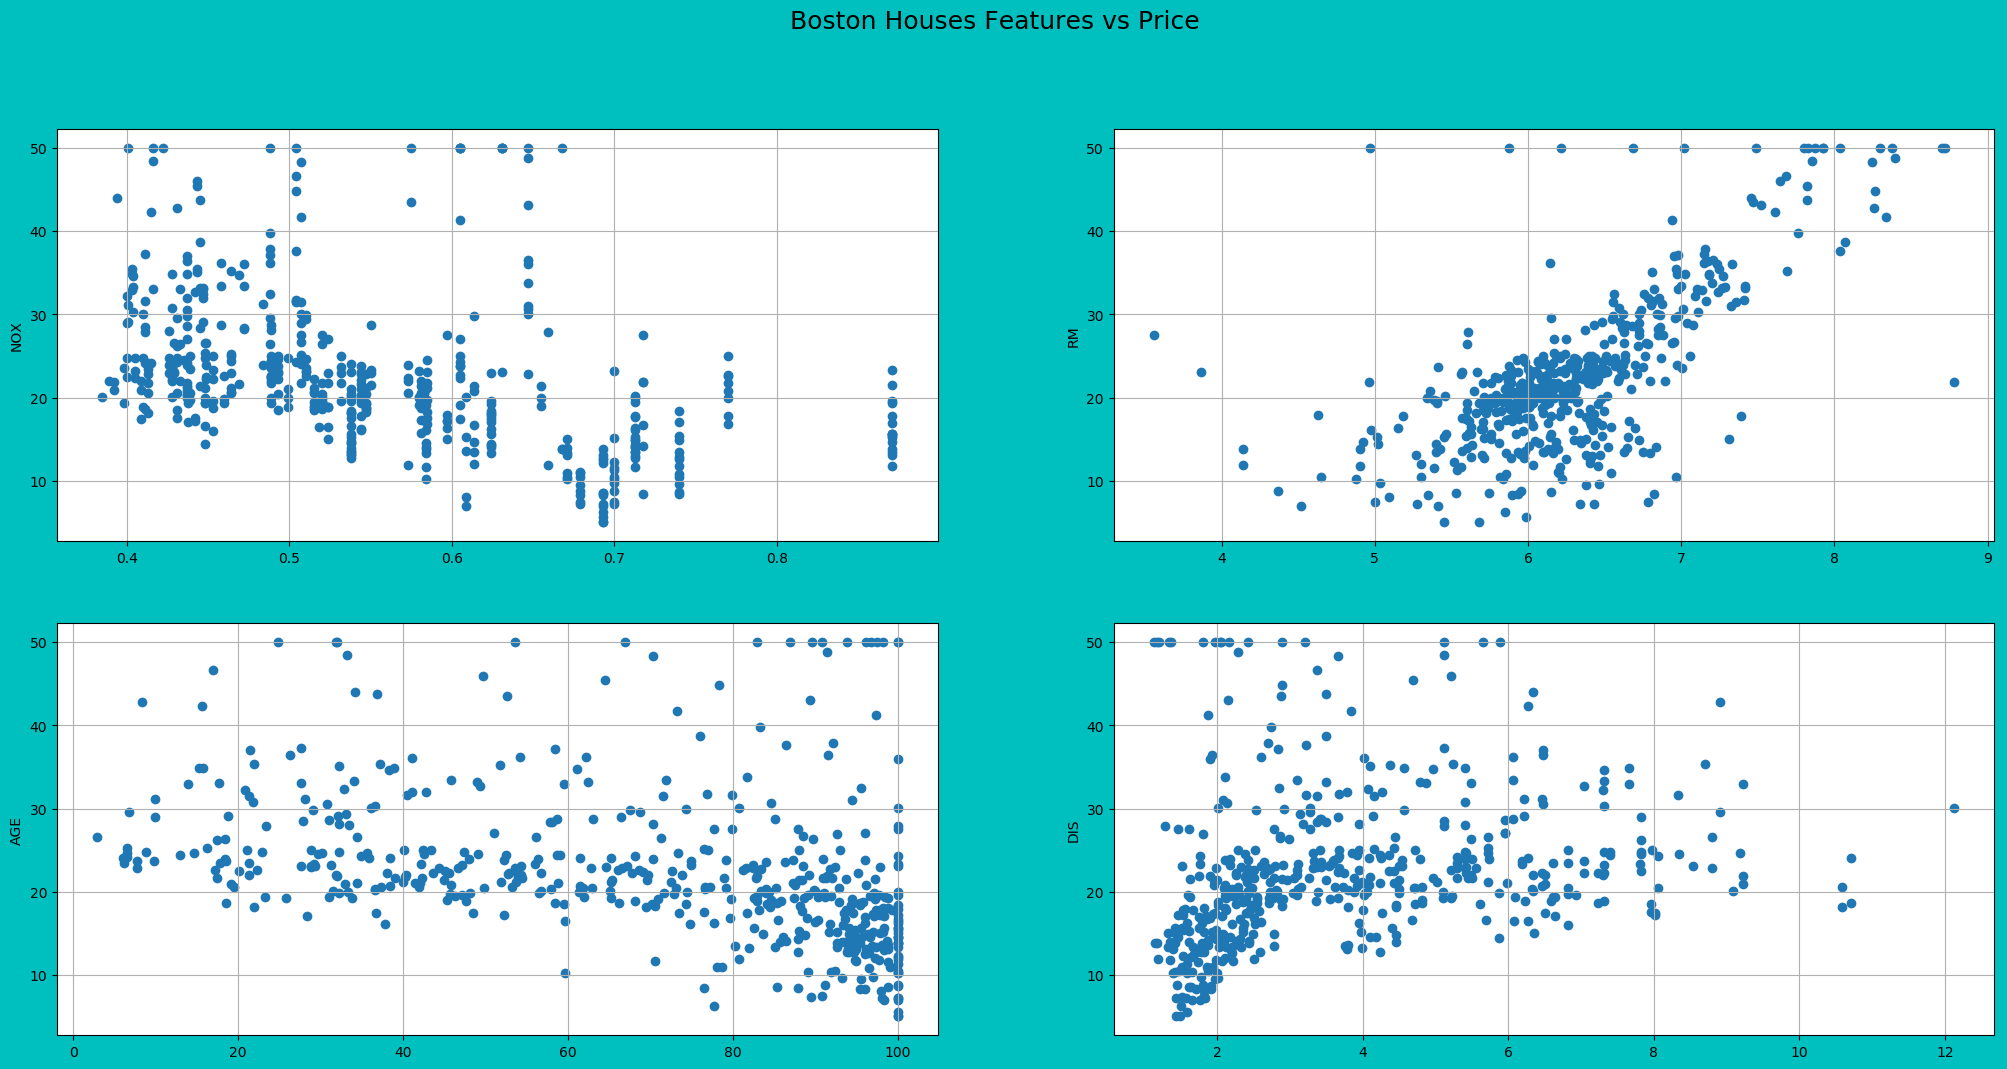

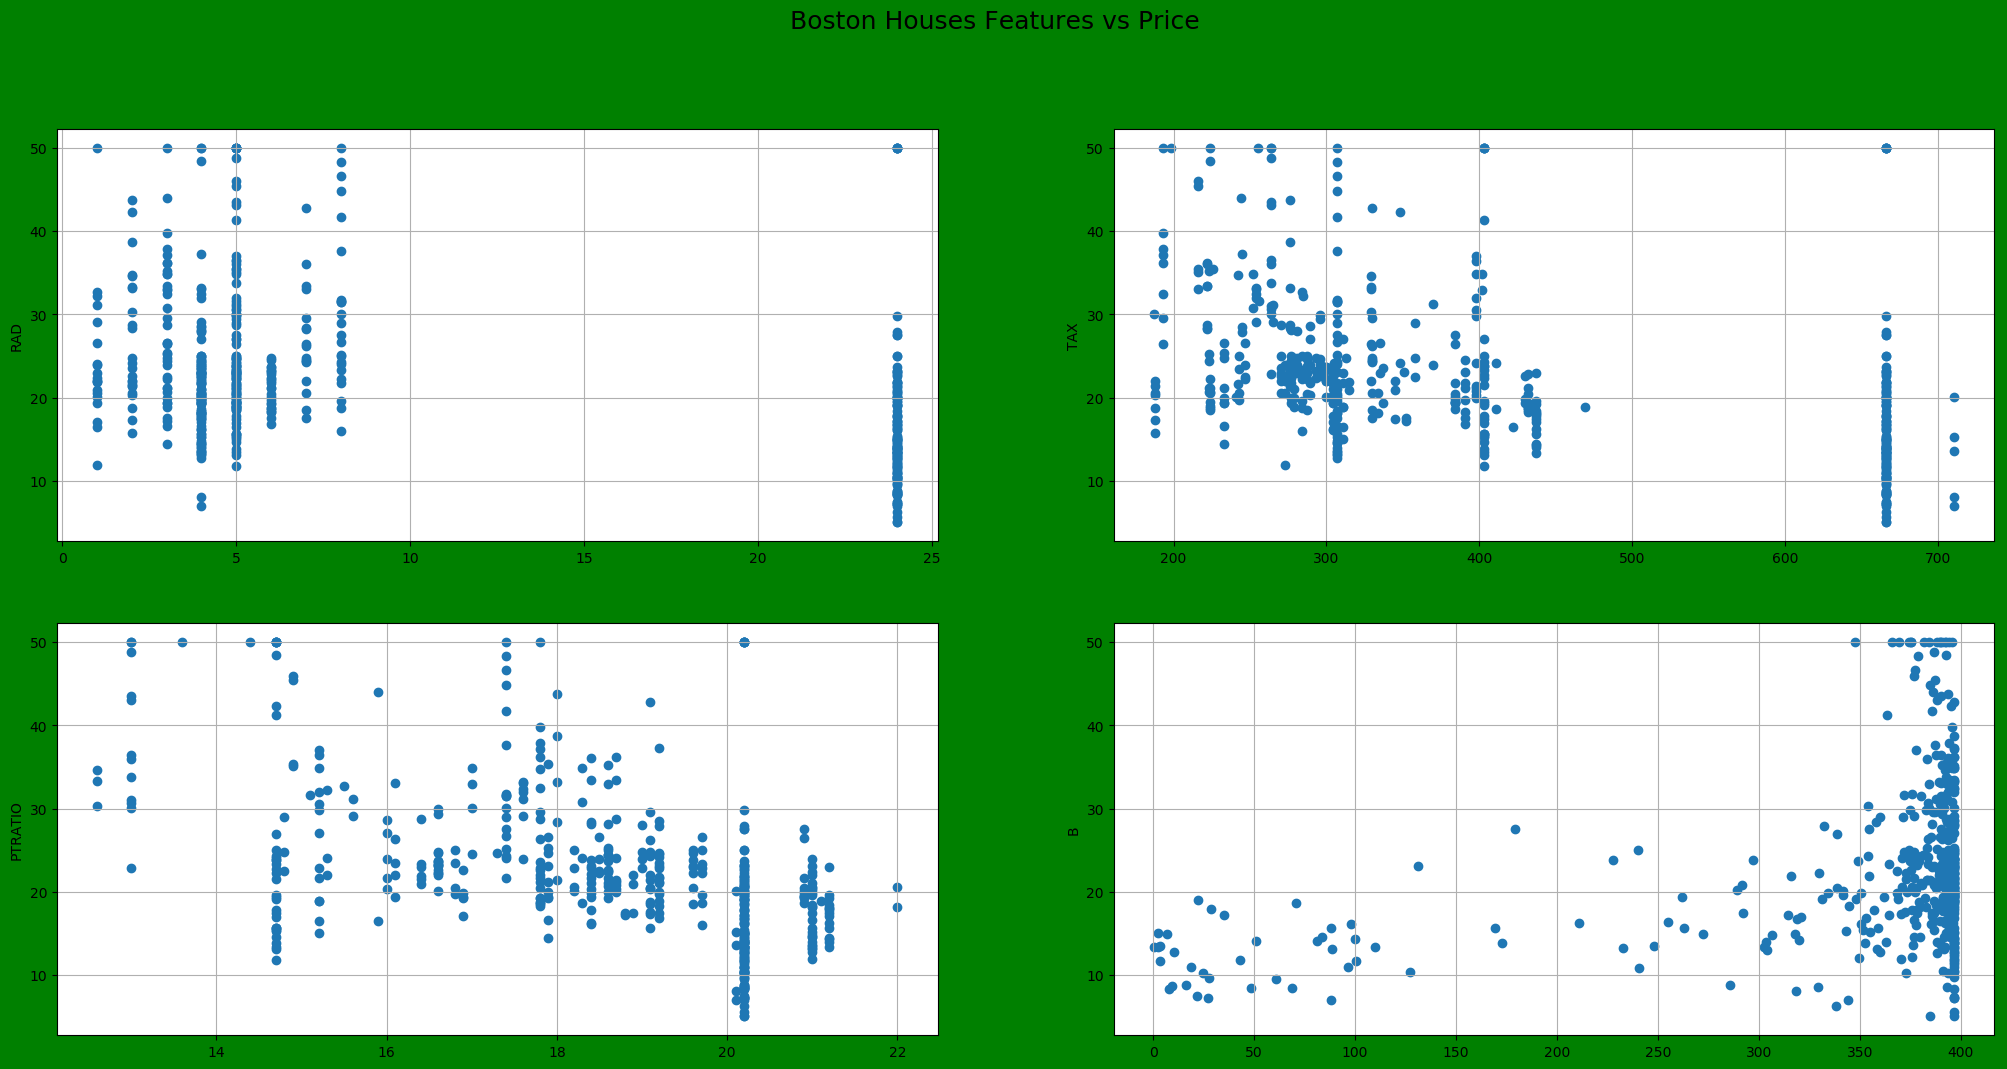

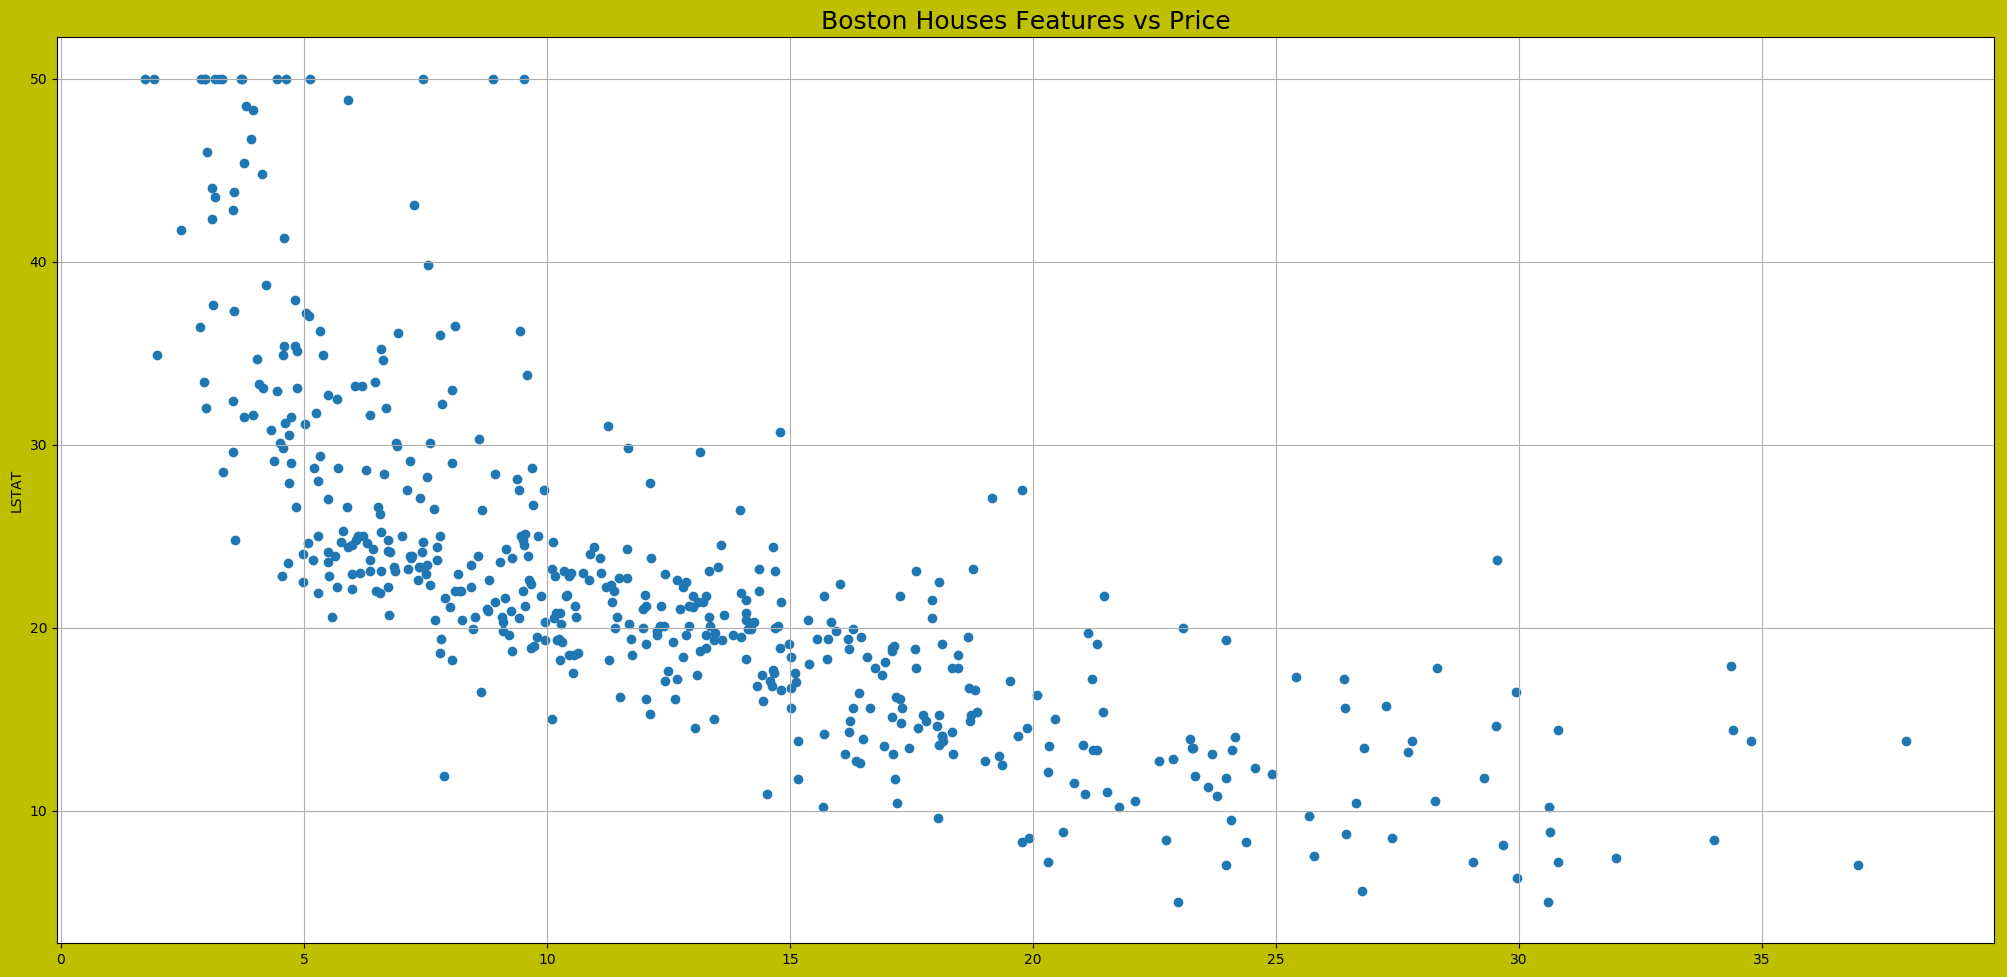

In [13]:
#Boston Houses Features vs Price


#ax.title.set_text('Boston Houses Features vs Price')
fig = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='y', edgecolor='k')
fig.suptitle('Boston Houses Features vs Price', fontsize=18)
ax1 = fig.add_subplot(221)

ax1.scatter(boston.target,bostan_col.CRIM)
plt.grid()
ax2 = fig.add_subplot(222)
plt.ylabel('CRIM')
ax2.scatter(bostan_col.ZN,boston.target)
plt.ylabel('ZN')
plt.grid()
ax3 = fig.add_subplot(223)

ax3.scatter(bostan_col.INDUS,boston.target)
plt.ylabel('INDUS')
plt.grid()
ax4 = fig.add_subplot(224)
ax4.scatter(bostan_col.CHAS,boston.target)
plt.ylabel('CHAS')
plt.grid()
plt.show()
fig1 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='c', edgecolor='k')
fig1.suptitle('Boston Houses Features vs Price', fontsize=18)
ax5 = fig1.add_subplot(221)
ax5.scatter(bostan_col.NOX,boston.target)
plt.ylabel('NOX')
plt.grid()
ax6 = fig1.add_subplot(222)
ax6.scatter(bostan_col.RM,boston.target)
plt.ylabel('RM')
plt.grid()
ax7 = fig1.add_subplot(223)
ax7.scatter(bostan_col.AGE,boston.target)
plt.ylabel('AGE')
plt.grid()
ax8 = fig1.add_subplot(224)
ax8.scatter(bostan_col.DIS,boston.target)
plt.ylabel('DIS')
plt.grid()
plt.show()
fig2 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='g', edgecolor='k')
fig2.suptitle('Boston Houses Features vs Price', fontsize=18)
ax9 = fig2.add_subplot(221)
ax9.scatter(bostan_col.RAD,boston.target)
plt.ylabel('RAD')
plt.grid()
ax10 = fig2.add_subplot(222)
ax10.scatter(bostan_col.TAX,boston.target)
plt.ylabel('TAX')
plt.grid()
ax11 = fig2.add_subplot(223)
ax11.scatter(bostan_col.PTRATIO,boston.target)
plt.ylabel('PTRATIO')
plt.grid()
ax12 = fig2.add_subplot(224)
ax12.scatter(bostan_col.B,boston.target)
plt.ylabel('B')
plt.grid()
fig3 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='y', edgecolor='k')

plt.scatter(bostan_col.LSTAT,boston.target)
plt.title('Boston Houses Features vs Price', fontsize=18)
plt.ylabel('LSTAT')
plt.grid()
plt.show()

In [14]:
bostan['PRICE'] = boston.target
# Boston datasets with 13 feautures  label as X
X = bostan.drop('PRICE', axis = 1) 
#Boston dataset's price for 13 features lanel as Y
Y = bostan['PRICE']

print(X.head())
print(Y.shape)

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
(506,)


In [15]:
#Training and testing datasets splitting with cross_validation


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_df = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(X)))
Y_df=Y

In [19]:
# Training and testing datasets splitting with cross_validation
# Training and testing splitting data with 70% and 30%
# randomserach cross_validation is used
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_df,Y_df,test_size = 0.40,random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))

(303, 13)
(203, 13)
(303,)
(203,)
<class 'pandas.core.frame.DataFrame'>


RMSE= 5.38813125502015


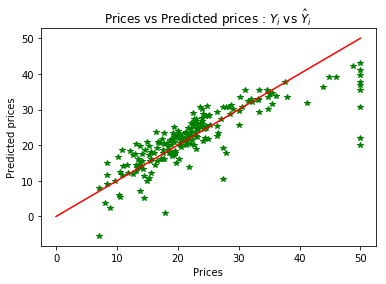

In [20]:
#linear Regression on Bostan House Dataset


#code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
error=abs(Y_test-Y_pred)
total_error = np.dot(error,error)
# Compute RMSE
rmse_lr= np.sqrt(total_error/len(error))
print('RMSE=',rmse_lr)
#plt.show()
plt.plot(Y_test, Y_pred,'g*')
plt.plot([0,50],[0,50], 'r-')
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()

# Delta_Error and Prediction of price using Linear regression

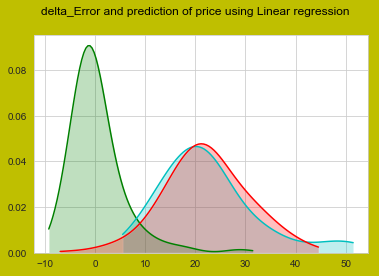

In [21]:
delta_y = Y_test - Y_pred
import seaborn as sns
fig3 = plt.figure( facecolor='y', edgecolor='k')
fig3.suptitle('delta_Error and prediction of price using Linear regression')
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),shade=True, color="g", bw=0.5)
sns.kdeplot(np.array(Y_test),shade=True, color="c", bw=0.5)
sns.kdeplot(np.array(Y_pred),shade=True, color="r", bw=0.5)

# sklearn.linear_model.SGDRegressor

In [22]:
models_performence1 = {'Model':[],'Batch_Size':[],'RMSE': [],'MSE':[],'Iteration':[],'Optimal learning Rate':[],}
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate


In [23]:
def square(list):
    return [(i ** 2) for i in list]

In [24]:
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
#Here, alpha is as learning rate

def sgdreg_function(x,initial_batch_size):
    #initial_batch_size=100
    batch=[]
    
    for l in range(x):
        batch_size_value= initial_batch_size + initial_batch_size * l
        batch.append(batch_size_value)
        z=0
        scale_max=np.max(Y_test[0:batch_size_value])
        
        Learning_rate=1 # initial learning rate=1
        score=[]
        LR=[] # storing value for learning rate
        Total_score=[]
        epoch1=[]
        global delta_error
        delta_error=[]
        Y_Test=[]
        global Y_hat_Predicted
        Y_hat_Predicted=[]
        test_cost=[]
        train_cost=[]
        n_iter=100
        for k in range(1,batch_size_value+1):
            # Appending learning rate 
            LR.append(Learning_rate) 
            
            # SGDRegressor
            sgdreg = linear_model.SGDRegressor(penalty='none', 
                                               alpha=Learning_rate
                                               , n_iter=100)
          
            
            yii=Y_train[0:batch_size_value]
            xii=X_train[0:batch_size_value]
            xtt=X_test[0:batch_size_value]
            ytt=Y_test[0:batch_size_value]
            Y_Test.append(ytt)
            
            clf=sgdreg.fit(xii,yii)
            Traing_score=clf.score(xii,yii)
            train_cost.append(Traing_score)
            training_error=1-Traing_score
             
            # p predicting on x_test
            
            y_hat = sgdreg.predict(xtt)
            #testing_score=clf.score()
            clf1=sgdreg.fit(xtt,ytt)
            Testing_score=clf1.score(xtt,ytt)
            test_cost.append(Testing_score)
            Testing_error=1-Testing_score
            Y_hat_Predicted.append(y_hat)
            # error = Y_test - y_prediction
            err = abs(ytt - y_hat)
            delta_error.append(err)
            
            score.append(Testing_score)
            # print(rmse)
            
            # Iteration 
            iteration_no=sgdreg.n_iter_
            epoch1.append(iteration_no)
            #print('Epoch=',iteration_no)
            #print('Learning_rate',Learning_rate) 

            Learning_rate=Learning_rate/2
            z+=1
        print("Training Error=",training_error)  
        print("Testing_error",Testing_error)
       
        models_performence1['Model'].append('sklearn.linear_model.SGDRegressor')
        # graph (Y_test) Prices Vs  (Y_prediction) Predicted prices
        fig4 = plt.figure( facecolor='c', edgecolor='k')
        fig4.suptitle('(Y_test) Prices Vs  (Y_prediction) Predicted prices: $Y_i$ vs $\hat{Y}_i$ with batch size='+str(batch[l]), fontsize=12)
        plt.plot(Y_Test,Y_hat_Predicted,'g*')
        plt.plot([0,batch_size_value],[0,batch_size_value], 'r-')
        
        plt.xlabel('Y_test')
        plt.ylabel('Y_predicted')
        plt.show()

 
        # Plot delta_Error and prediction of price
        fig3 = plt.figure( facecolor='y', edgecolor='k')
        fig3.suptitle('delta_Error and prediction of price with batch size='+str(batch[l]), fontsize=12)
        sns.set_style('darkgrid')
        Y_sklearn=np.array(sum(delta_error)/len(delta_error))
        sns.distplot(Y_sklearn,kde_kws={"color": "g", "lw": 3, "label": "Delta_error_sklearn"} )
        sns.kdeplot(np.array(y_hat),shade=True, color="r", bw=0.5)
        plt.show()
        
        # Plot epoch Vs  RMSE
        fig = plt.figure( facecolor='y', edgecolor='k')
        fig.suptitle('epoch Vs  RMSE with batch size='+str(batch[l]), fontsize=12)
        ax1 = fig.add_subplot(111)          
        plt.plot(epoch1,score,'m*',linestyle='dashed')
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('RMSE with batch size=')
        
        
        models_performence1['Iteration'].append(sum(epoch1)/len(epoch1))
        
        # plot Iterations Vs Train Cost & Test cost
        fig4 = plt.figure( facecolor='c', edgecolor='k')
        fig4.suptitle('Iterations Vs Train Cost & Test cost with batch size='+str(batch[l]), fontsize=12)
        plt.plot(epoch1,train_cost,'m*',linestyle='dashed', label='Train cost')
        plt.plot(epoch1,test_cost,'r*', linestyle='dashed',label='Test cost')
        plt.legend(loc='lower left')
        plt.grid()
        plt.xlabel('Iterations ')
        plt.ylabel('Performance Cost  ')
        plt.show()

        # Plot Learning rate Vs  RMSE
        fig2 = plt.figure( facecolor='y', edgecolor='k')
        fig2.suptitle('Learning rate Vs  RMSE with batch size='+str(batch[l]), fontsize=12)
        ax2 = fig2.add_subplot(111)
        #ax2.set_title("Learning rate Vs  RMSE")
        plt.plot(LR,score,'m*',linestyle='dashed')
        plt.grid()
        plt.xlabel('Learning rate')
        plt.ylabel('RMSE')
        plt.show() 
        
        
        global best_Learning_rate
        best_Learning_rate=LR[score.index(min(score))]
        models_performence1['Optimal learning Rate'].append(best_Learning_rate)
        print('\nThe best value of best_Learning_rate is %d.' % (best_Learning_rate),7)
        MSEscore=scale_max*sum(score)/len(score)
        score_value=np.sqrt(MSEscore)
        print('Batch Size',batch[l])
        
        models_performence1['Batch_Size'].append(batch[l])
        print("RMSE with batch size="+str(batch[l]),score_value)
        models_performence1['RMSE'].append(score_value)
        print("MSE with batch size="+str(batch[l]),MSEscore)
        models_performence1['MSE'].append(MSEscore)

# linear_model.SGDRegressor in sklearn for different batch size

Training Error= 0.5354782847881729
Testing_error 0.33800042197410185


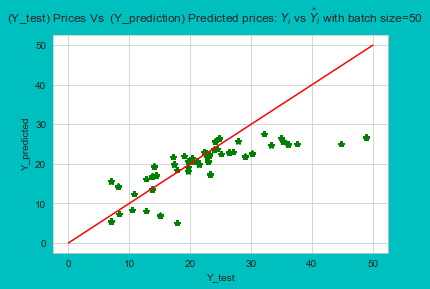

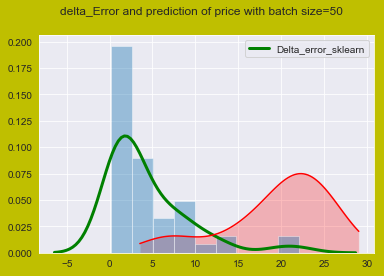

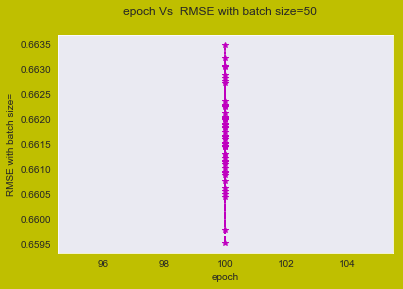

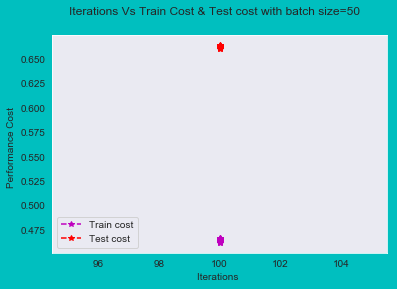

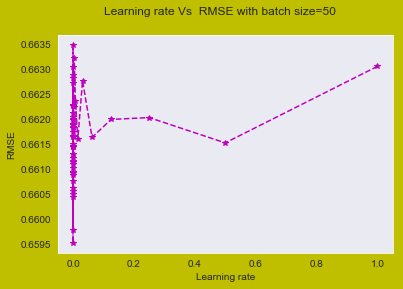


The best value of best_Learning_rate is 0. 7
Batch Size 50
RMSE with batch size=50 5.682338862804557
MSE with batch size=50 32.28897495173899
Training Error= 0.4408312897204105
Testing_error 0.3911212507535229


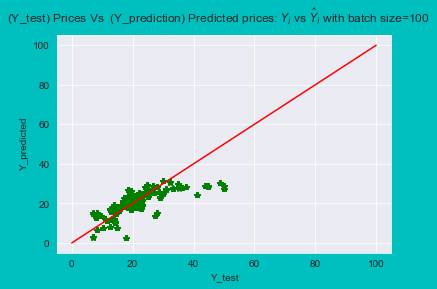

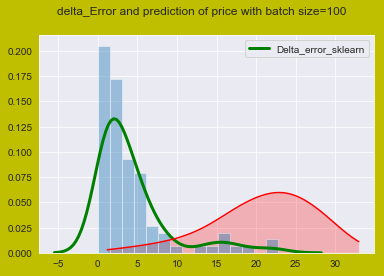

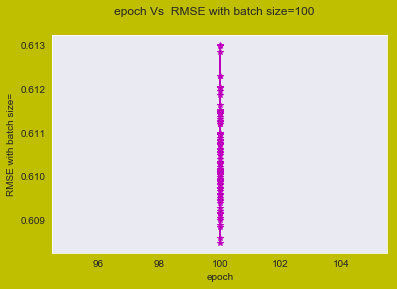

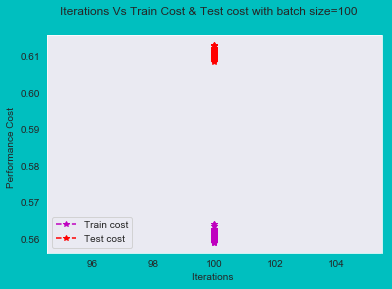

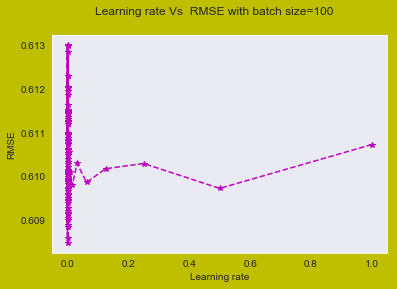


The best value of best_Learning_rate is 0. 7
Batch Size 100
RMSE with batch size=100 5.524602742667597
MSE with batch size=100 30.521235464290342
Training Error= 0.3366746305380679
Testing_error 0.4210652461732962


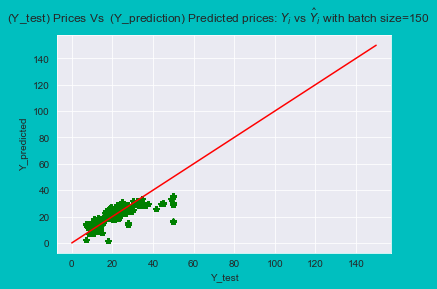

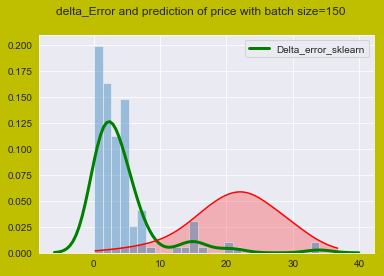

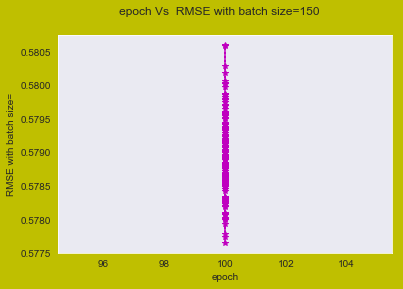

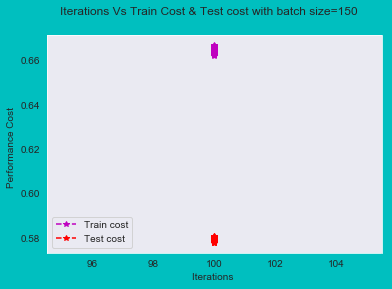

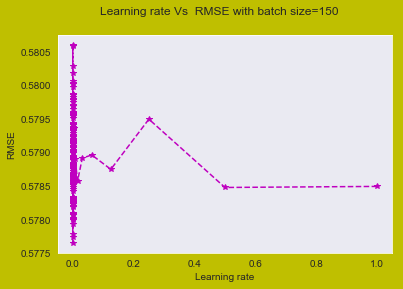


The best value of best_Learning_rate is 0. 7
Batch Size 150
RMSE with batch size=150 5.380419330394379
MSE with batch size=150 28.948912170881503
Training Error= 0.3792389668901831
Testing_error 0.3855008250352814


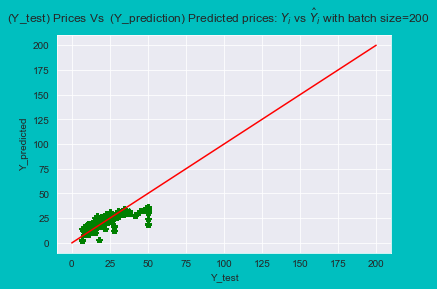

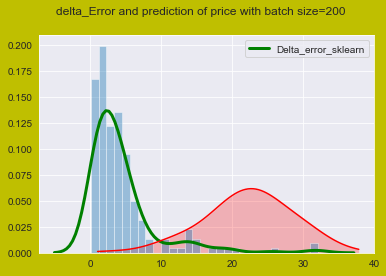

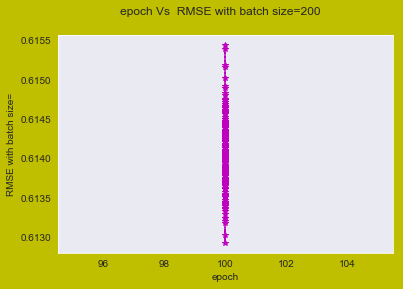

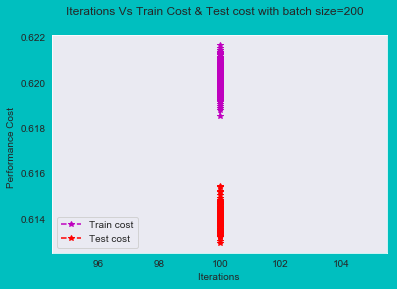

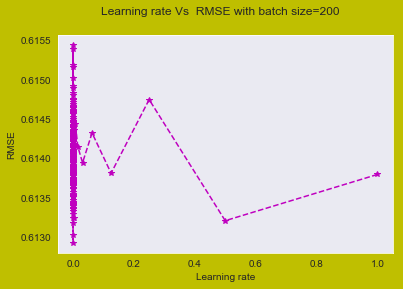


The best value of best_Learning_rate is 0. 7
Batch Size 200
RMSE with batch size=200 5.5410809637587795
MSE with batch size=200 30.703578246929922


In [25]:
sgdreg_function(4,50)

In [26]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,sklearn.linear_model.SGDRegressor,50,5.682339,32.288975,100.0,4.547474e-13
1,sklearn.linear_model.SGDRegressor,100,5.524603,30.521235,100.0,2.441406e-04
2,sklearn.linear_model.SGDRegressor,150,5.380419,28.948912,100.0,1.323489e-23
3,sklearn.linear_model.SGDRegressor,200,5.541081,30.703578,100.0,4.135903e-25


# Standardization training and testing data accourding to batch size

# Manual SGD function

In [27]:
models_performence1 = {'Model':[],'Batch_Size':[],'RMSE': [],'MSE':[],'Iteration':[],'Optimal learning Rate':[],}
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate


In [28]:
def denorm(scale,list):
    return [(scale*i) for i in list]
# scale
scale=np.max(Y_test)
print(scale)

50.0


In [29]:
# SGD function
#L(w,b)=min w,b{sum(square{yi-wTxi-b})}
def SGD(batch_size):    
    X_batch_size =X_train[:batch_size]
    price_batch_size =Y_train[:batch_size]
    X_test_batch=X_test[:batch_size]
    ytt_batch_size= Y_test[:batch_size]
    
    
    
   
    N = len(X_batch_size)
  
    xi_1=[]
    yprice=[]
    xtt=[]
    ytt=[]
    ytt1=[]
    for j in range(N):
        # standardization of datasets
        scaler = StandardScaler()
        scaler.fit(X_batch_size) 
        X_scaled_batch_size = scaler.transform(X_batch_size)
        X_scaled_batch_size=preprocessing.normalize(X_scaled_batch_size)
        xi_1.append(X_scaled_batch_size)
        
        X_test_batch_size=scaler.transform(X_test_batch)
        X_test_batch_size=preprocessing.normalize(X_test_batch_size)
        xtt.append(X_test_batch_size)
        Y_scaled_batch_size=np.asmatrix(price_batch_size)
        #Y_scaled_batch_size=preprocessing.normalize(Y_scaled_batch_size)
        yprice.append(Y_scaled_batch_size)
        Ytt_scaled_batch_size1=np.asmatrix(Y_test[:batch_size])
        Ytt_scaled_batch_size=preprocessing.normalize(Ytt_scaled_batch_size1)
        ytt1.append(Ytt_scaled_batch_size1)
        ytt.append(Ytt_scaled_batch_size)
        
    xi=xi_1
    price=yprice
   
    Lw = 0
    Lb = 0
    learning_rate = 1
    iteration = 1
    w0_random = np.random.rand(13)
    w0 = np.asmatrix(w0_random).T
    b = np.random.rand()
    b0 = np.random.rand() 
    global learning_rate1
    learning_rate1=[]
    global epoch
    epoch=[]
    global rmse1
    rmse1=[]
    global y_hat_manual_SGD
    y_hat_manual_SGD=[]
    global delta_Error
    delta_Error=[]
    

    while True:
        learning_rate1.append(learning_rate)
        epoch.append(iteration)

        for i in range(N):
            wj=w0
            bj=b0
            #derivative of Lw w.r.t w
            #Lw= sum({-2*xi}{yi-wT.xi-b})
            #print(price[i] .shape)
            Lw = (1/N)*np.dot((-2*xi[i].T ), (price[i] - np.dot( xi[i],wj) - bj))
            #derivative of Lb w.r.t b
            #lb=sum(-2*{yi-wTxi-b})
            Lb = (-2/N)*(price[i] - np.dot( xi[i],wj ) - bj)
            #print('yi',Lw.shape)
            y_new=(1/N)*(xtt[i].dot(Lw))+Lb 
            #print(y_new[i])
            y_pred=np.absolute(np.array(y_new[i]))
            y_hat_manual_SGD.append( y_pred)

            delta_error = np.absolute(np.array(ytt[i] ) - np.array(y_new[i]))
            delta_Error.append(delta_error.mean())
            #delta_error=price[i]  - y_new[i]  

            error=np.sum(np.dot(delta_error ,delta_error.T))

        rmse1.append(error)

        w0_new = Lw * learning_rate
        b0_new = Lb * learning_rate
        wj = w0 - w0_new
        bj = b0 - b0_new
        iteration += 1
        if (w0==wj).all():
            break
        else:
            w0 = wj
            b0 = bj
            learning_rate = learning_rate/2

    print('For batch size'+str(batch_size))
    

    RMSE=(scale*np.asarray(rmse1))
    
    # Y_test function
    vvv=denorm(1,ytt1)
    cv=vvv[0]  
    # Y_hat_test function after normationzation
    cvv=denorm(scale,y_hat_manual_SGD[batch_size])        
    #print(sum(delta_error)/len(delta_error))
    fig4 = plt.figure( facecolor='c', edgecolor='k')
    fig4.suptitle('(Y_test) Prices Vs  (Y_prediction) Predicted prices: $Y_i$ vs $\hat{Y}_i$ with batch size=', fontsize=12)
    plt.plot(cv,cvv,'g*')
    plt.plot([0,batch_size],[0,batch_size], 'r-')

    plt.xlabel('Y_test')
    plt.ylabel('Y_predicted')
    plt.show()
    
     # Plot delta_Error and prediction of price
    fig3 = plt.figure( facecolor='y', edgecolor='k')
    fig3.suptitle('delta_Error  with batch size='+str(batch_size), fontsize=12)
    sns.set_style('darkgrid')
    sns.distplot(np.array(delta_Error),kde_kws={"color": "r", "lw": 3, "label": "Delta_error_manual"} )
    #sns.kdeplot(np.array(ghy),shade=True, color="r", bw=0.5)
    plt.show()
    
    #For plotting epoch vs RMSE
    models_performence1['Model'].append('SGD Manual Function')
    models_performence1['Batch_Size'].append(batch_size)
    fig = plt.figure( facecolor='c', edgecolor='k')
    fig.suptitle('epoch Vs RMSE with batch size='+str(batch_size), fontsize=12)
    ax1 = fig.add_subplot(111)
    plt.plot(epoch,RMSE,'r*',linestyle='dashed')
    plt.xlabel('epoch')
    plt.ylabel('RMSE with batch size='+str(batch_size))
    plt.plot(epoch,RMSE,'y',linestyle='dashed')
    plt.show()
    
    #Best learning rate
    global best_Learning_rate1
    best_Learning_rate1=learning_rate1[rmse1.index(min(rmse1))]
    print('\nThe best value of best_Learning_rate is %d.' % (best_Learning_rate1))
    models_performence1['Optimal learning Rate'].append(best_Learning_rate1)
    fig1 = plt.figure( facecolor='y', edgecolor='k')
    fig1.suptitle('Learning rate Vs RMSE with batch size='+str(batch_size), fontsize=12)
    ax1 = fig1.add_subplot(111)
    plt.plot(learning_rate1,rmse1,'m*')
    plt.xlabel('Learning rate')
    plt.ylabel('RMSE')

    
    global RMSE_value
    MSE_value = sum(rmse1)/len(rmse1)
    print("MSE_value=",MSE_value  )
    models_performence1['MSE'].append(MSE_value)
    RMSE_value =np.sqrt(MSE_value)
    models_performence1['RMSE'].append(RMSE_value)
   
   
    models_performence1['Iteration'].append(iteration)
    
    print("RMSE = ",RMSE_value)
    print('For batch size'+str(batch_size))
    
    
    print('iteration =',iteration)
   
    print('Total number of learning_rate=',len(learning_rate1))
    plt.plot(learning_rate1,rmse1,'y',linestyle='dashed')
    plt.show()

In [ ]:
X_batch_size =X_train[:batch_size]
    price_batch_size =Y_train[:batch_size]
    X_test_batch=X_test[:batch_size]
    ytt_batch_size= Y_test[:batch_size]
    N = len(X_batch_size)
    xi_1=[]
    yprice=[]
    xtt=[]
    ytt=[]
    ytt1=[]
    for j in range(N):
        # standardization of datasets
        scaler = StandardScaler()
        scaler.fit(X_batch_size)
        X_scaled_batch_size = scaler.transform(X_batch_size)
        X_scaled_batch_size=preprocessing.normalize(X_scaled_batch_size)
        xi_1.append(X_scaled_batch_size)
        X_test_batch_size=scaler.transform(X_test_batch)
        X_test_batch_size=preprocessing.normalize(X_test_batch_size)
        xtt.append(X_test_batch_size)
        Y_scaled_batch_size=np.asmatrix(price_batch_size)
        #Y_scaled_batch_size=preprocessing.normalize(Y_scaled_batch_size)
        yprice.append(Y_scaled_batch_size)
        Ytt_scaled_batch_size1=np.asmatrix(Y_test[:batch_size])
        Ytt_scaled_batch_size=preprocessing.normalize(Ytt_scaled_batch_size1)
        ytt1.append(Ytt_scaled_batch_size1)
        ytt.append(Ytt_scaled_batch_size)
    xi=xi_1
    price=yprice
    Lw = 0
    Lb = 0
    learning_rate = 1
    iteration = 1
    w0_random = np.random.rand(13)
    w0 = np.asmatrix(w0_random).T
    b = np.random.rand()
    b0 = np.random.rand()
    global learning_rate1
    learning_rate1=[]
    global epoch
    epoch=[]
    global rmse1
    rmse1=[]
    global y_hat_manual_SGD
    y_hat_manual_SGD=[]
    global delta_Error
    delta_Error=[]
    while True:
        learning_rate1.append(learning_rate)
        epoch.append(iteration)
        for i in range(N):
            wj=w0
            bj=b0
            #derivative of Lw w.r.t w
            #Lw= sum({-2*xi}{yi-wT.xi-b})
            #print(price[i] .shape)
            Lw = (1/N)*np.dot((-2*xi[i].T ), (price[i] - np.dot( xi[i],wj)) #derivative of Lb w.r.t b
            #lb=sum(-2*{yi-wTxi-b})
            Lb = (-2/N)*(price[i] - np.dot( xi[i],wj ) - bj)
            #print('yi',Lw.shape)
            y_new=(1/N)*(xtt[i].dot(Lw))+Lb
            #print(y_new[i])
            y_pred=np.absolute(np.array(y_new[i]))
            y_hat_manual_SGD.append( y_pred)
            delta_error = np.absolute(np.array(ytt[i] ) - np.array(y_new[i]))
            delta_Error.append(delta_error.mean())
            #delta_error=price[i] - y_new[i]
            error=np.sum(np.dot(delta_error ,delta_error.T))
            rmse1.append(error)
            w0_new = Lw * learning_rate
            b0_new = Lb * learning_rate
            wj = w0 - w0_new
            bj = b0 - b0_new
            iteration += 1
            if (w0==wj).all():
                break
            else:
                w0 = wj
                b0 = bj
                learning_rate = learning_rate/2
    print('For batch size'+str(batch_size))
    RMSE=(scale*np.asarray(rmse1))
    # Y_test function
    vvv=denorm(1,ytt1)
    cv=vvv[0]
    # Y_hat_test function after normationzation
    cvv=denorm(scale,y_hat_manual_SGD[batch_size])
    #print(sum(delta_error)/len(delta_error))
    fig4 = plt.figure( facecolor='c', edgecolor='k')
    fig4.suptitle('(Y_test) Prices Vs (Y_prediction) Predicted prices: $Y_plt.plot(cv,cvv,'g*')
    plt.plot([0,batch_size],[0,batch_size], 'r-')
    plt.xlabel('Y_test')
    plt.ylabel('Y_predicted')
    plt.show()
    # Plot delta_Error and prediction of price
    fig3 = plt.figure( facecolor='y', edgecolor='k')
    fig3.suptitle('delta_Error with batch size='+str(batch_size), fontsize=sns.set_style('darkgrid')
    sns.distplot(np.array(delta_Error),kde_kws={"color": "r", "lw": 3, "label": #sns.kdeplot(np.array(ghy),shade=True, color="r", bw=0.5)
    plt.show()
    #For plotting epoch vs RMSE
    models_performence1['Model'].append('SGD Manual Function')
    models_performence1['Batch_Size'].append(batch_size)
    fig = plt.figure( facecolor='c', edgecolor='k')
    fig.suptitle('epoch Vs RMSE with batch size='+str(batch_size), fontsize=ax1 = fig.add_subplot(111)
    plt.plot(epoch,RMSE,'r*',linestyle='dashed')
    plt.xlabel('epoch')
    plt.ylabel('RMSE with batch size='+str(batch_size))
    plt.plot(epoch,RMSE,'y',linestyle='dashed')
    plt.show()
    #Best learning rate
    global best_Learning_rate1
    best_Learning_rate1=learning_rate1[rmse1.index(min(rmse1))]
    print('\nThe best value of best_Learning_rate is %d.' % (best_Learning_rate)) 

50
For batch size50


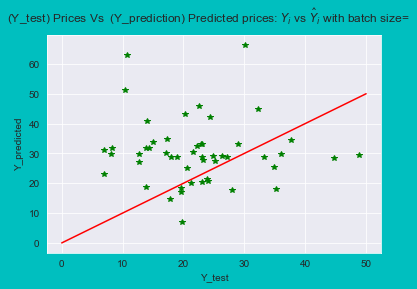

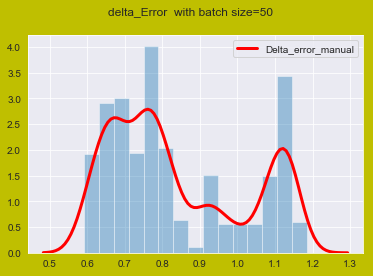

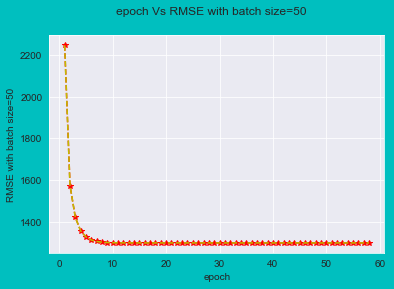


The best value of best_Learning_rate is 0.
MSE_value= 26.455867357378217
RMSE =  5.143526743138235
For batch size50
iteration = 59
Total number of learning_rate= 58


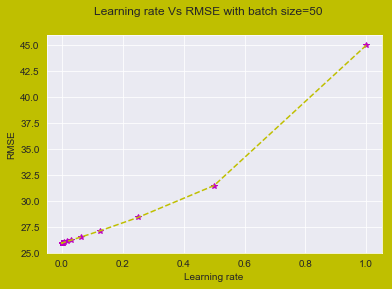

100
For batch size100


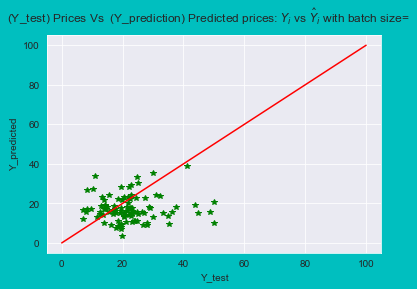

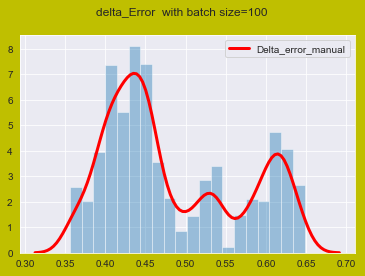

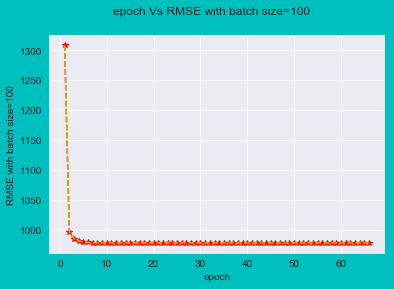


The best value of best_Learning_rate is 0.
MSE_value= 19.669658760643173
RMSE =  4.4350489017194805
For batch size100
iteration = 67
Total number of learning_rate= 66


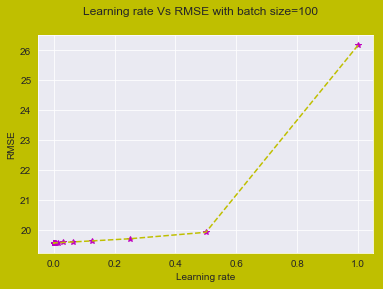

150
For batch size150


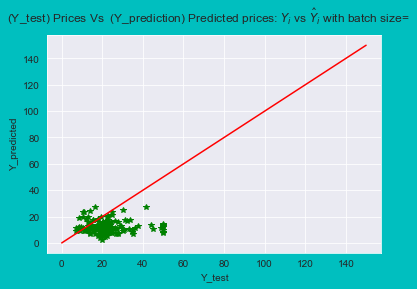

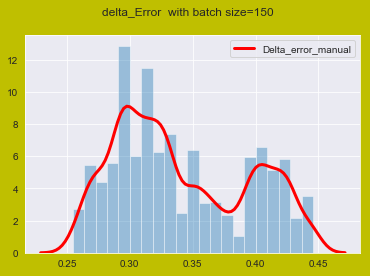

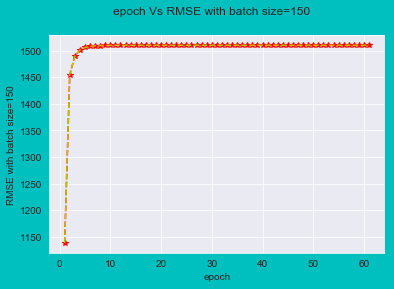


The best value of best_Learning_rate is 1.
MSE_value= 30.052165135524493
RMSE =  5.4819855103351465
For batch size150
iteration = 62
Total number of learning_rate= 61


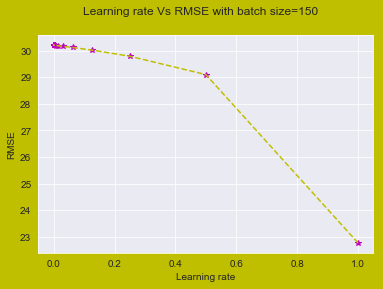

200
For batch size200


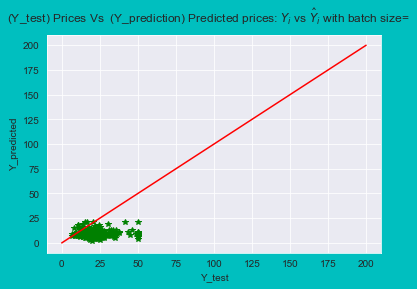

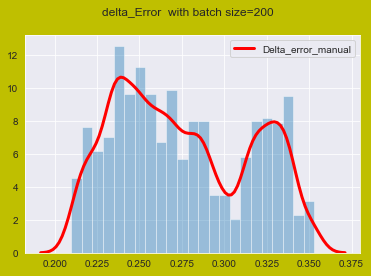

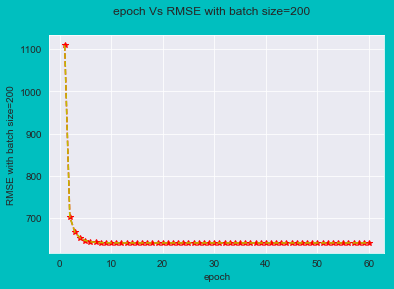


The best value of best_Learning_rate is 0.
MSE_value= 13.011328285991997
RMSE =  3.607121883994495
For batch size200
iteration = 61
Total number of learning_rate= 60


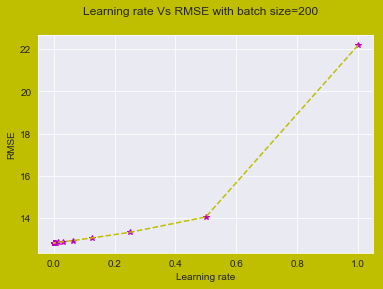

In [30]:
initial_batch_size=50

for l in range(4):
    batch_size_value= initial_batch_size + initial_batch_size * l
    
    print(batch_size_value)
    SGD(batch_size_value)

In [31]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,SGD Manual Function,50,5.143527,26.455867,59,2.220446e-16
1,SGD Manual Function,100,4.435049,19.669659,67,8.881784e-16
2,SGD Manual Function,150,5.481986,30.052165,62,1.000000e+00
3,SGD Manual Function,200,3.607122,13.011328,61,2.220446e-16


# SGD_Manual Vs SGD_sklearn

In [32]:
models_performence1 = {'Model':[],'Batch_Size':[],'RMSE': [], 'MSE':[],'Iteration':[],'Optimal learning Rate':[],}
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate


# for batch size 150

For batch size150


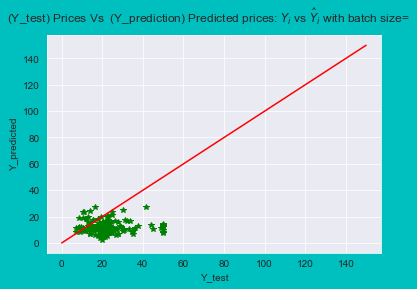

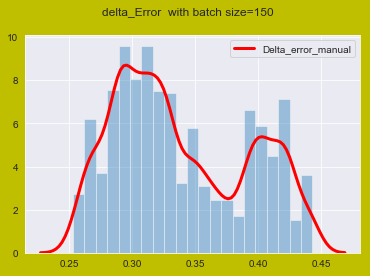

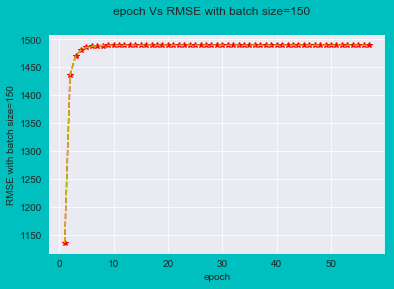


The best value of best_Learning_rate is 1.
MSE_value= 29.637043260961814
RMSE =  5.443991482447581
For batch size150
iteration = 58
Total number of learning_rate= 57


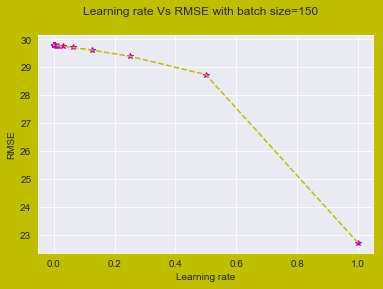

In [33]:
SGD(150)

Training Error= 0.33563472830624475
Testing_error 0.42192424660967787


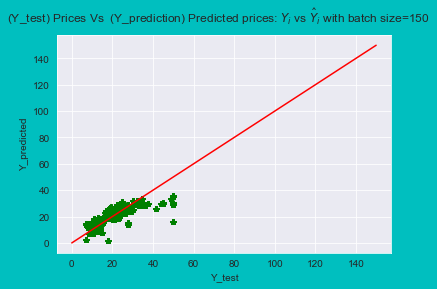

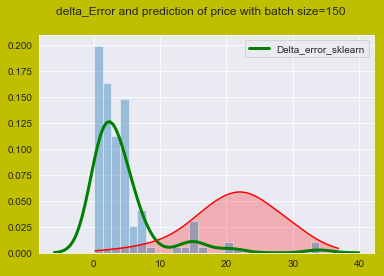

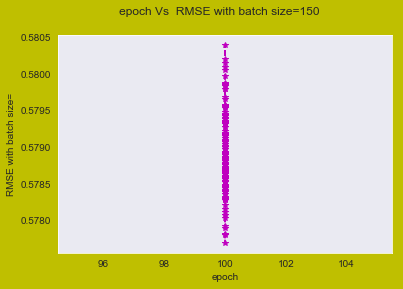

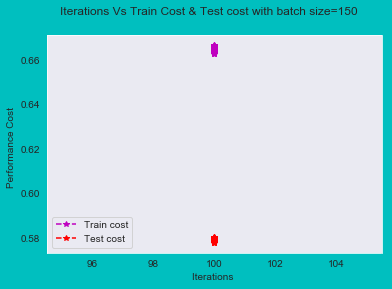

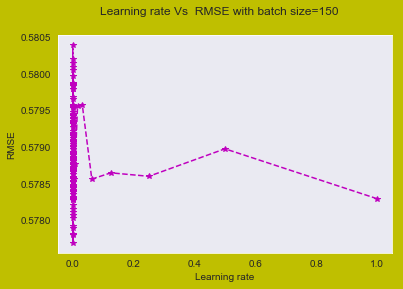


The best value of best_Learning_rate is 0. 7
Batch Size 150
RMSE with batch size=150 5.380197606600564
MSE with batch size=150 28.946526286070437


In [34]:
sgdreg_function(1,150)

In [35]:
def y_hat_cal(delta_error_sklearn,delta_Error_manual):
    fig41 = plt.figure( facecolor='y', edgecolor='k')
    fig41.suptitle('Y_predicted using manual SGD Vs Y_predicted using Sklearn SGD ', fontsize=12)

    sns.set_style('darkgrid')
    Y_sklearn=np.array(sum(delta_error_sklearn)/len(delta_error_sklearn))

    Y_manual=np.array(delta_Error_manual)
    #print(Y_manual[0])
    sns.distplot(Y_sklearn,kde_kws={"color": "g", "lw": 3, "label": "Delta_error_sklearn"} )
    sns.distplot(Y_manual,kde_kws={"color": "r", "lw": 3, "label": "Delta_error_manual"} )
    fig51 = plt.figure( facecolor='y', edgecolor='k')
    fig51.suptitle('Y_predicted using manual SGD ', fontsize=12)
    sns.distplot(Y_sklearn,kde_kws={"color": "g", "lw": 3, "label": "Delta_error_sklearn"} )

    fig41 = plt.figure( facecolor='y', edgecolor='k')
    fig41.suptitle(' Y_predicted using Sklearn SGD ', fontsize=12)
    sns.distplot(Y_manual,kde_kws={"color": "r", "lw": 3, "label": "Delta_error_manual"} )

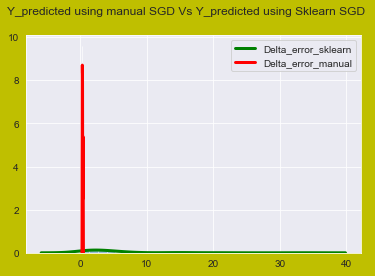

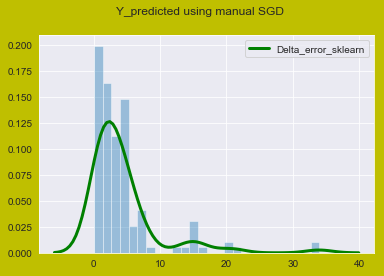

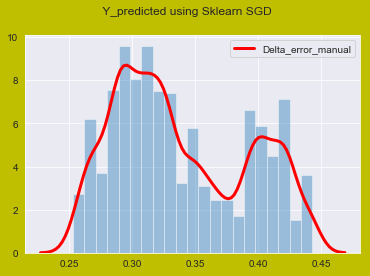

In [36]:
y_hat_cal(delta_error,delta_Error)

In [37]:
def y_skl_maual(y_hat_sklearn,y_hat_maunal):
    fig41 = plt.figure( facecolor='y', edgecolor='k')
    fig41.suptitle('Delta_error using manual SGD Vs Delta_error using Sklearn SGD ', fontsize=12)

    sns.set_style('whitegrid')
    Y_sklearn=np.array(sum(y_hat_sklearn)/len(y_hat_sklearn))

    Y_manual=np.array(scale*sum(y_hat_maunal)/len(y_hat_maunal))
    #print(Y_manual[0])

    sns.kdeplot(Y_sklearn,shade=True, color="c", bw=0.5,label='Y_hat_sklearn')
    sns.kdeplot(Y_manual[0],shade=True, color="r", bw=0.5,label='Y_hat_manual')

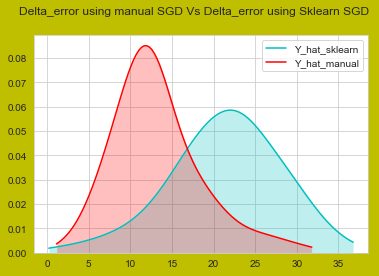

In [38]:
y_skl_maual(Y_hat_Predicted,y_hat_manual_SGD)

In [39]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,SGD Manual Function,150,5.443991,29.637043,58.0,1.000000e+00
1,sklearn.linear_model.SGDRegressor,150,5.380198,28.946526,100.0,1.972152e-31
